In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    confusion_matrix, roc_curve, auc, classification_report
)

# folders
os.makedirs("outputs", exist_ok=True)

pd.set_option("display.max_columns", None)
np.random.seed(42)
print("Ready ✅")


Ready ✅


In [10]:
DATA_PATH = "../data/Heart-Disease.csv"
if not os.path.exists(DATA_PATH):
    raise FileNotFoundError("Place your Kaggle CSV at data/heart.csv and rerun this cell.")

df = pd.read_csv(DATA_PATH)
#print(df.shape)          # rows, columns
#print(df.columns)        # column names
df.head()                # first few rows
#df.info()                # data types & missing values



,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia,target
0,52,Male,Typical angina,125,212,Lower than 120 mg/ml,ST-T wave abnormality,168,No,1.0,Downsloping,Two,Reversable Defect,0
1,53,Male,Typical angina,140,203,Greater than 120 mg/ml,Normal,155,Yes,3.1,Upsloping,Zero,Reversable Defect,0
2,70,Male,Typical angina,145,174,Lower than 120 mg/ml,ST-T wave abnormality,125,Yes,2.6,Upsloping,Zero,Reversable Defect,0
3,61,Male,Typical angina,148,203,Lower than 120 mg/ml,ST-T wave abnormality,161,No,0.0,Downsloping,One,Reversable Defect,0
4,62,Female,Typical angina,138,294,Greater than 120 mg/ml,ST-T wave abnormality,106,No,1.9,Flat,Three,Fixed Defect,0


In [4]:
display(df.describe(include="all").T)
df.isna().sum()


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,1025.0,NaN,NaN,NaN,54.434146,9.07229,29.0,48.0,56.0,61.0,77.0
sex,1025,2,Male,713,NaN,NaN,NaN,NaN,NaN,NaN,NaN
chest_pain_type,1025,4,Typical angina,497,NaN,NaN,NaN,NaN,NaN,NaN,NaN
resting_blood_pressure,1025.0,NaN,NaN,NaN,131.611707,17.516718,94.0,120.0,130.0,140.0,200.0
cholestoral,1025.0,NaN,NaN,NaN,246.0,51.59251,126.0,211.0,240.0,275.0,564.0
fasting_blood_sugar,1025,2,Lower than 120 mg/ml,872,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rest_ecg,1025,3,ST-T wave abnormality,513,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Max_heart_rate,1025.0,NaN,NaN,NaN,149.114146,23.005724,71.0,132.0,152.0,166.0,202.0
exercise_induced_angina,1025,2,No,680,NaN,NaN,NaN,NaN,NaN,NaN,NaN
oldpeak,1025.0,NaN,NaN,NaN,1.071512,1.175053,0.0,0.0,0.8,1.8,6.2


age                              0
sex                              0
chest_pain_type                  0
resting_blood_pressure           0
cholestoral                      0
fasting_blood_sugar              0
rest_ecg                         0
Max_heart_rate                   0
exercise_induced_angina          0
oldpeak                          0
slope                            0
vessels_colored_by_flourosopy    0
thalassemia                      0
target                           0
dtype: int64

In [6]:
possible_targets = ["target", "HeartDisease", "num"]  # common names
target_col = None
for c in possible_targets:
    if c in df.columns:
        target_col = c
        break
if target_col is None:
    raise KeyError(f"Could not find a target column among {possible_targets}. Check your CSV columns: {df.columns.tolist()}")

print("Target column:", target_col)


Target column: target


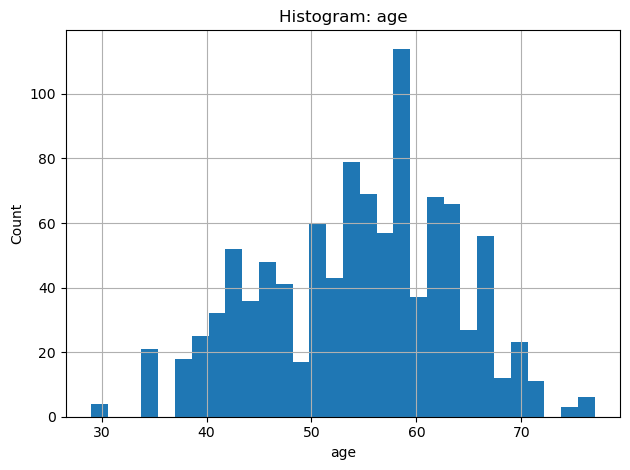

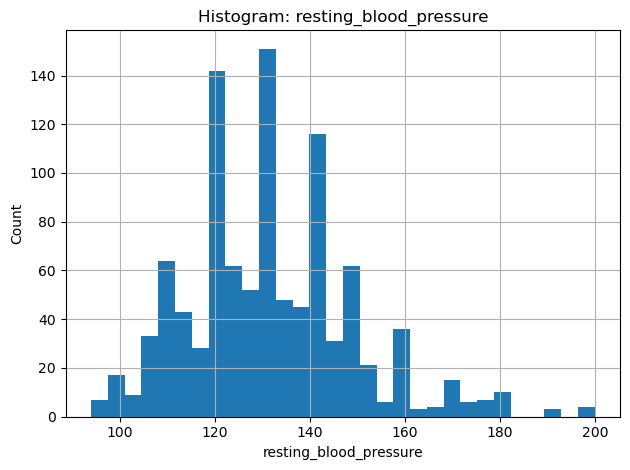

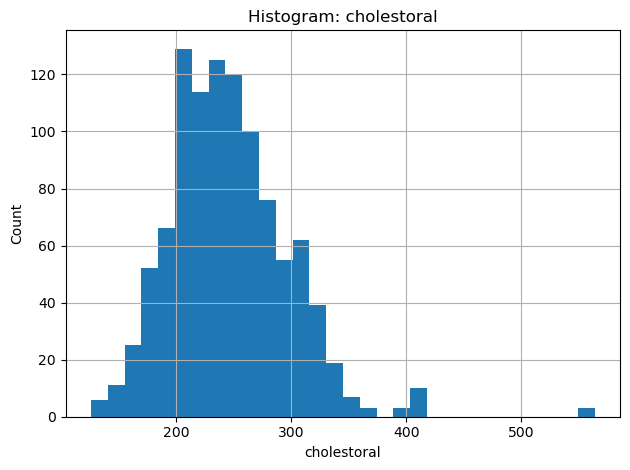

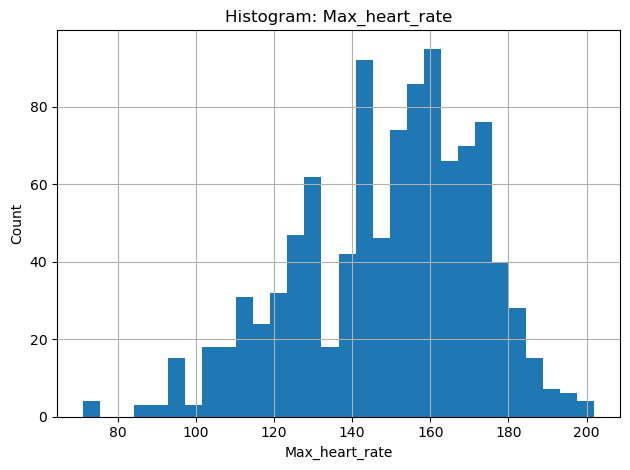

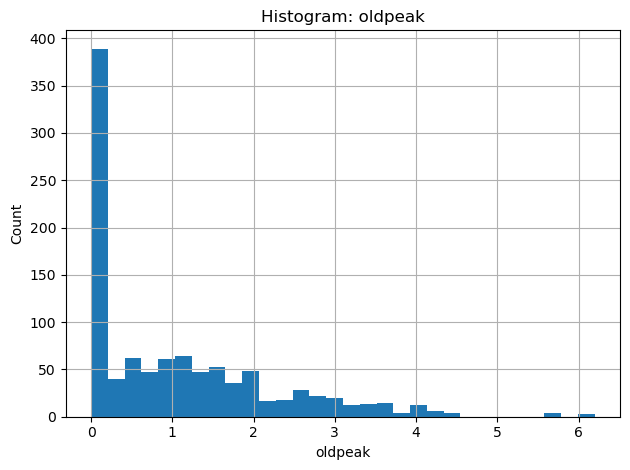

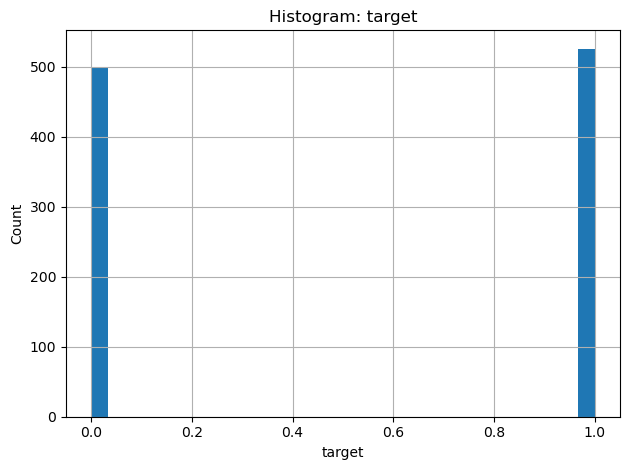

Saved 6 histograms to outputs/.


In [7]:
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

for col in numeric_cols:
    plt.figure()
    df[col].hist(bins=30)
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.title(f"Histogram: {col}")
    plt.tight_layout()
    plt.savefig(f"outputs/hist_{col}.png", dpi=120)
    plt.show()

print(f"Saved {len(numeric_cols)} histograms to outputs/.")


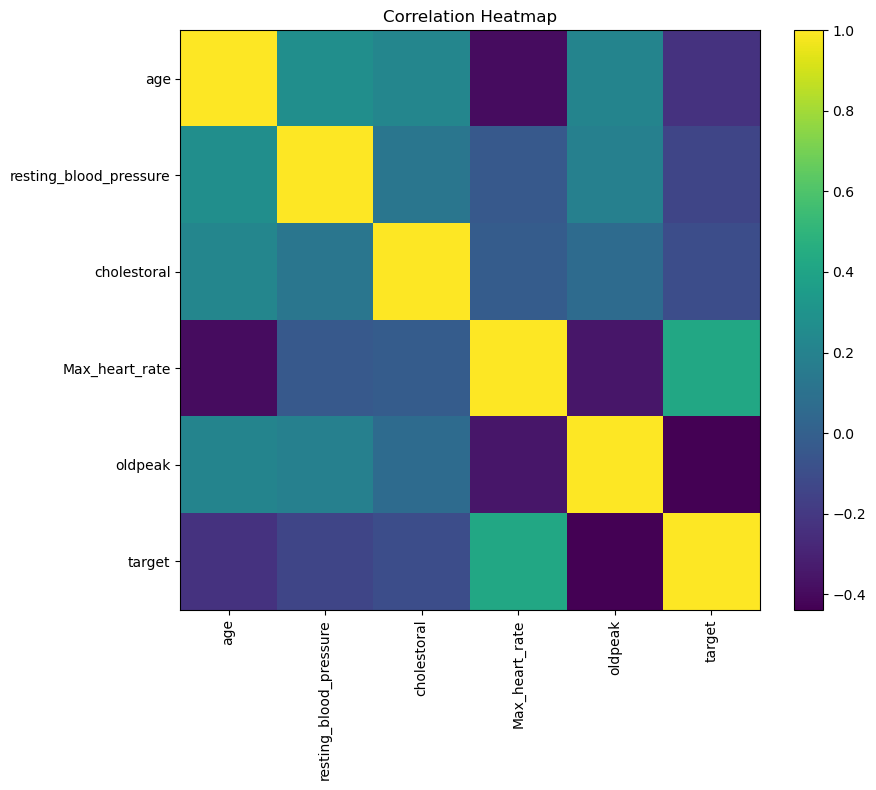

,age,resting_blood_pressure,cholestoral,Max_heart_rate,oldpeak,target
age,1.000,0.271,0.220,-0.390,0.208,-0.229
resting_blood_pressure,0.271,1.000,0.128,-0.039,0.187,-0.139
cholestoral,0.220,0.128,1.000,-0.022,0.065,-0.100
Max_heart_rate,-0.390,-0.039,-0.022,1.000,-0.350,0.423
oldpeak,0.208,0.187,0.065,-0.350,1.000,-0.438
target,-0.229,-0.139,-0.100,0.423,-0.438,1.000


In [8]:
corr = df[numeric_cols].corr()

plt.figure(figsize=(10,8))
im = plt.imshow(corr.values, interpolation='nearest')
plt.colorbar(im, fraction=0.046, pad=0.04)
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.savefig("outputs/correlation_heatmap.png", dpi=150)
plt.show()

corr.round(3)


In [15]:
df.dtypes

age                                int64
sex                               object
chest_pain_type                   object
resting_blood_pressure             int64
cholestoral                        int64
fasting_blood_sugar               object
rest_ecg                          object
Max_heart_rate                     int64
exercise_induced_angina           object
oldpeak                          float64
slope                             object
vessels_colored_by_flourosopy     object
thalassemia                       object
target                             int64
dtype: object

In [16]:
categorical_cols = df.select_dtypes(include=['object']).columns
print("Categorical columns:", categorical_cols.tolist())

df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

Categorical columns: ['sex', 'chest_pain_type', 'fasting_blood_sugar', 'rest_ecg', 'exercise_induced_angina', 'slope', 'vessels_colored_by_flourosopy', 'thalassemia']


In [17]:
X = df_encoded.drop(columns=[target_col])
y = df_encoded[target_col].astype(int)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Only scale numeric features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)


In [18]:
log_reg = LogisticRegression(max_iter=1000, random_state=42)
dt      = DecisionTreeClassifier(random_state=42)
rf      = RandomForestClassifier(n_estimators=300, random_state=42)

log_reg.fit(X_train_scaled, y_train)
dt.fit(X_train, y_train)   # no scaling for trees
rf.fit(X_train, y_train)   # no scaling for trees

print("Models trained ✅")


Models trained ✅



Logistic Regression report:
              precision    recall  f1-score   support

           0       0.89      0.84      0.87       100
           1       0.86      0.90      0.88       105

    accuracy                           0.87       205
   macro avg       0.87      0.87      0.87       205
weighted avg       0.87      0.87      0.87       205


Decision Tree report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       100
           1       1.00      0.97      0.99       105

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205


Random Forest report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      1.00      1.00       105

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205

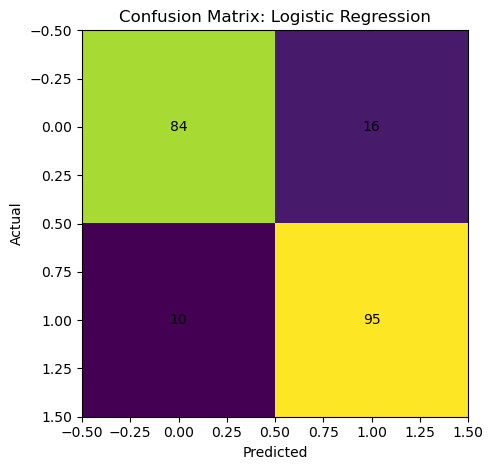

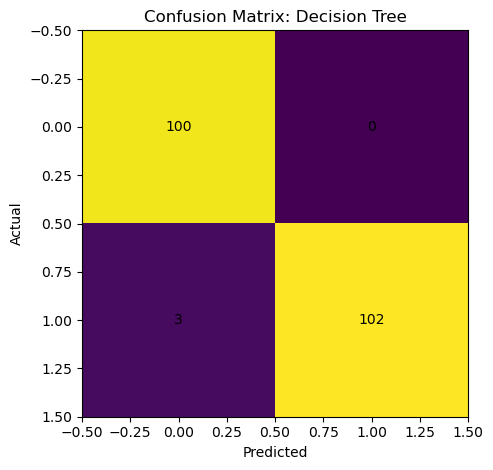

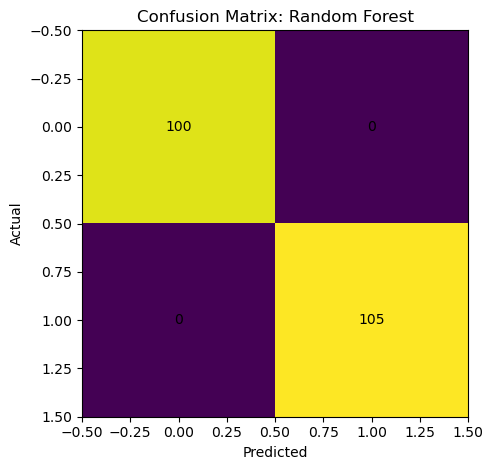

,Model,Accuracy,Precision,Recall
0,Random Forest,1.000000,1.0,1.000000
1,Random Forest,1.000000,1.0,1.000000
2,Decision Tree,0.985366,1.0,0.971429


In [19]:
def evaluate(model, X_te, y_te, name):
    y_pred = model.predict(X_te)
    acc  = accuracy_score(y_te, y_pred)
    prec = precision_score(y_te, y_pred, zero_division=0)
    rec  = recall_score(y_te, y_pred, zero_division=0)
    cm   = confusion_matrix(y_te, y_pred)
    print(f"\n{name} report:")
    print(classification_report(y_te, y_pred, zero_division=0))
    return {"Model": name, "Accuracy": acc, "Precision": prec, "Recall": rec, "CM": cm}

results = []
results.append(evaluate(log_reg, X_test_scaled, y_test, "Logistic Regression"))
results.append(evaluate(dt,      X_test,       y_test, "Decision Tree"))
results.append(evaluate(rf,      X_test,       y_test, "Random Forest"))

# Save CM plots
for r in results:
    cm = r["CM"]
    plt.figure()
    plt.imshow(cm, interpolation='nearest')
    plt.title(f"Confusion Matrix: {r['Model']}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, cm[i, j], ha='center', va='center')
    plt.tight_layout()
    safe = r['Model'].lower().replace(" ", "_")
    plt.savefig(f"outputs/confusion_matrix_{safe}.png", dpi=150)
    plt.show()

metrics_df = pd.DataFrame([{k:v for k,v in r.items() if k != "CM"}])
for r in results[1:]:
    metrics_df = pd.concat([metrics_df, pd.DataFrame([{k:v for k,v in r.items() if k != "CM"}])], ignore_index=True)

metrics_df = metrics_df.sort_values(by="Accuracy", ascending=False).reset_index(drop=True)
metrics_df.to_csv("outputs/metrics.csv", index=False)
metrics_df


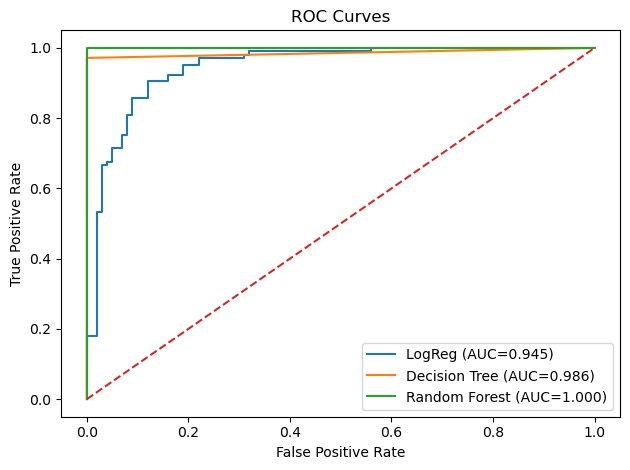

(np.float64(0.9454285714285715),
 np.float64(0.9857142857142858),
 np.float64(1.0))

In [20]:
plt.figure()

# Logistic (use scaled)
y_score_log = log_reg.predict_proba(X_test_scaled)[:, 1]
fpr_log, tpr_log, _ = roc_curve(y_test, y_score_log)
auc_log = auc(fpr_log, tpr_log)
plt.plot(fpr_log, tpr_log, label=f"LogReg (AUC={auc_log:.3f})")

# Decision Tree
y_score_dt = dt.predict_proba(X_test)[:, 1]
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_score_dt)
auc_dt = auc(fpr_dt, tpr_dt)
plt.plot(fpr_dt, tpr_dt, label=f"Decision Tree (AUC={auc_dt:.3f})")

# Random Forest
y_score_rf = rf.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_score_rf)
auc_rf = auc(fpr_rf, tpr_rf)
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC={auc_rf:.3f})")

plt.plot([0,1], [0,1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves")
plt.legend()
plt.tight_layout()
plt.savefig("outputs/roc_curves.png", dpi=150)
plt.show()

auc_log, auc_dt, auc_rf


In [21]:
best = metrics_df.iloc[0]
lines = []
lines.append(
    f"Best by accuracy: {best['Model']} "
    f"(Accuracy={best['Accuracy']:.3f}, Precision={best['Precision']:.3f}, Recall={best['Recall']:.3f})."
)

# Emphasize recall for screening (catch positives)
if best["Recall"] >= 0.85:
    lines.append("High recall is valuable for medical screening (fewer missed positive cases).")
elif best["Recall"] >= 0.70:
    lines.append("Recall is decent; consider tuning if missing positives is costly.")
else:
    lines.append("Recall is modest; try class weights, threshold tuning, or resampling to increase sensitivity.")

# AUC ranking
auc_pairs = [("Logistic Regression", auc_log), ("Decision Tree", auc_dt), ("Random Forest", auc_rf)]
auc_pairs.sort(key=lambda x: x[1], reverse=True)
lines.append("AUC ranking: " + ", ".join([f"{n} (AUC={a:.3f})" for n,a in auc_pairs]) + ".")

text = "\n".join(lines)
with open("outputs/interpretation.txt", "w", encoding="utf-8") as f:
    f.write(text)

print(text)
print("\nSaved to outputs/interpretation.txt")


Best by accuracy: Random Forest (Accuracy=1.000, Precision=1.000, Recall=1.000).
High recall is valuable for medical screening (fewer missed positive cases).
AUC ranking: Random Forest (AUC=1.000), Decision Tree (AUC=0.986), Logistic Regression (AUC=0.945).

Saved to outputs/interpretation.txt


In [22]:
df.to_csv("outputs/cleaned_heart.csv", index=False)

In [24]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

print(train_df.columns.tolist())


['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholestoral', 'fasting_blood_sugar', 'rest_ecg', 'Max_heart_rate', 'exercise_induced_angina', 'oldpeak', 'slope', 'vessels_colored_by_flourosopy', 'thalassemia', 'target']


In [25]:
import pandas as pd

df = pd.read_csv("outputs/cleaned_heart.csv")
print(train_df.columns.tolist())


['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholestoral', 'fasting_blood_sugar', 'rest_ecg', 'Max_heart_rate', 'exercise_induced_angina', 'oldpeak', 'slope', 'vessels_colored_by_flourosopy', 'thalassemia', 'target']
